In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load datataset 
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# Encode the 'sex' column
encoder = LabelEncoder()
df["sex_encoded"] = encoder.fit_transform(df["sex"])

df[["sex", "sex_encoded"]].head()

,sex,sex_encoded
0,female,0
1,male,1
2,male,1
3,male,1
4,male,1


In [15]:
X = df[["sex_encoded"]]
y = df[["charges"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)
print("Coefficient (effect of sex):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R² Score:", r2_score(y_test, y_pred))
    

Coefficient (effect of sex): [1365.24005707]
Intercept: [12646.8826791]
R² Score: 0.00261212606335659


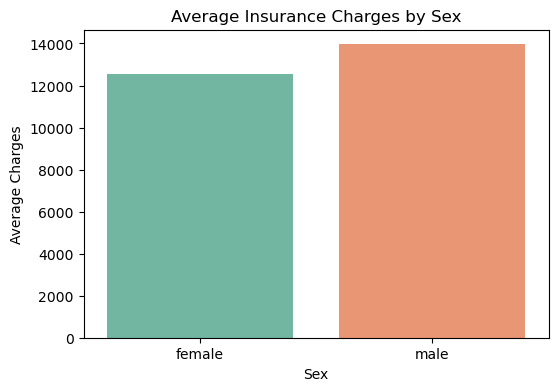

In [25]:
# Visualize the Result
plt.figure(figsize=(6,4))
sns.barplot(
    x="sex", 
    y="charges", 
    data=df, 
    estimator="mean", 
    errorbar=None,    # replaces ci=None
    hue="sex",        # assign sex to hue
    legend=False,     # avoids duplicate legend
    palette="Set2"
)
plt.title("Average Insurance Charges by Sex")
plt.ylabel("Average Charges")
plt.xlabel("Sex")
plt.show()


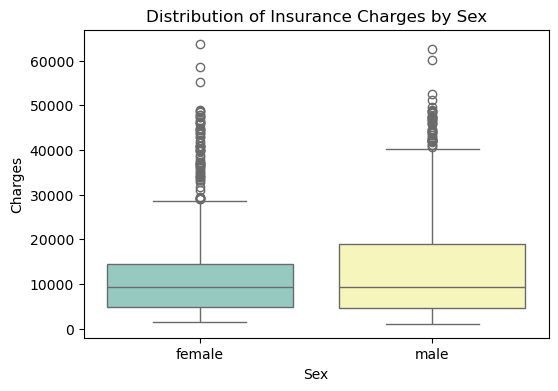

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x="sex", 
    y="charges", 
    data=df, 
    hue="sex",    
    legend=False,   
    palette="Set3"
)
plt.title("Distribution of Insurance Charges by Sex")
plt.ylabel("Charges")
plt.xlabel("Sex")
plt.show()


# Statistic Testing

In [28]:
from scipy.stats import ttest_ind

#split charges into two groups
male_charges =  df[df["sex"] == "male"]["charges"]
female_charges = df[df["sex"] == "female"]["charges"]

# perform independent t-test
t_stat, p_value = ttest_ind(male_charges, female_charges)

print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 2.097546590051688
p-value: 0.03613272100592976


### Interpretation and Summary

Based on the analysis, we tested whether sex has an impact on insurance charges.  
A simple linear regression with sex as the predictor showed only a weak relationship, but the independent t-test indicated a **statistically significant difference** between male and female charges (*t* = 2.09, *p* = 0.036).  
This means the difference is unlikely to be due to random chance.  

However, while the result is statistically significant, the effect of sex on insurance costs is relatively small compared to stronger predictors such as **smoking status, age, and BMI**.  
In practice, this suggests that sex alone is **not a major driver** of insurance charges in this dataset.
